In [1]:
import pandas as pd
import numpy as np
import os

**Please place all the data files in a folder named 'data' at a location where this notebook file is place**

In [2]:
df = pd.read_csv('C:/Users/Hari/7COM1039-0109-2020 - Advanced Computer Science Masters Project/data/111.csv', header=None, parse_dates = [1])
df.head()

,0,1,2,3
0,661,2016-01-01 00:00:00,8767,0
1,661,2016-01-01 00:01:00,8767,0
2,661,2016-01-01 00:02:00,8767,0
3,661,2016-01-01 00:03:00,8767,0
4,661,2016-01-01 00:04:00,8767,0


In [3]:
path = 'C:/Users/Hari/7COM1039-0109-2020 - Advanced Computer Science Masters Project/data/' 
files = os.listdir(path)

for f in files:
    df = pd.read_csv(path+f, header=None, parse_dates=[1])
    print("************************")
    print(f)
    print(df.shape)
    print(df[0].value_counts())
    print(df[1].max())
    print(df[1].min())
    print(df[1].max() - df[1].min())

************************
111.csv
(20144, 4)
661    20144
Name: 0, dtype: int64
2016-01-15 00:00:00
2016-01-01 00:00:00
14 days 00:00:00
************************
1111.csv
(20144, 4)
661    20144
Name: 0, dtype: int64
NaT
NaT
NaT
************************
1112.csv
(21233, 4)
661    21233
Name: 0, dtype: int64
NaT
NaT
NaT
************************
112.csv
(21233, 4)
661    21233
Name: 0, dtype: int64
2016-01-31 00:00:00
2016-01-16 00:00:00
15 days 00:00:00
************************
1121.csv
(20140, 4)
661    20140
Name: 0, dtype: int64
NaT
NaT
NaT
************************
121.csv
(20140, 4)
661    20140
Name: 0, dtype: int64
2017-01-15 00:00:00
2017-01-01 00:00:00
14 days 00:00:00
************************
122.csv
(21601, 4)
661    21601
Name: 0, dtype: int64
2017-01-31 00:00:00
2017-01-16 00:00:00
15 days 00:00:00
************************
1222.csv
(21600, 4)
781    21600
Name: 0, dtype: int64
NaT
NaT
NaT
************************
1311.csv
(20153, 4)
9971    20153
Name: 0, dtype: int64
NaT
NaT

In [4]:
# selecting train files from 2016-01-01 to 2016-01-15
train_files = ['111', '211','311']

### Creating Train Dataset

In [5]:
# creating a function for resampling and saving train datasets

def read_df(string):
    df = pd.read_csv('C:/Users/Hari/7COM1039-0109-2020 - Advanced Computer Science Masters Project/data/'+string+'.csv', header=None, parse_dates=[1])
    ID = 'id' + string[0]
    time = 'time' + string [0]
    cons = 'water_consumption' + string [0]
    df.columns = [ID, time, cons, 'unknown']
    df.drop(columns = 'unknown', axis = 1, inplace = True)
    df.set_index(time, inplace = True)
    df = df.resample('D').mean()
    print("Null value is observed in {}".format(df[df.isnull().any(axis =1)].index))
    
    # using bfill for replacing nan values where data is not foudn
    df = df.fillna(method = 'bfill')
    df[ID] = df[ID].astype(int)
    print(df.dtypes)
    return df

In [6]:
df1 = read_df('111')
print(df1.shape)

df2 = read_df('211')
print(df2.shape)

df3 = read_df('311')
print(df3.shape)



Null value is observed in DatetimeIndex([], dtype='datetime64[ns]', name='time1', freq='D')
id1                     int32
water_consumption1    float64
dtype: object
(15, 2)
Null value is observed in DatetimeIndex([], dtype='datetime64[ns]', name='time2', freq='D')
id2                     int32
water_consumption2    float64
dtype: object
(15, 2)
Null value is observed in DatetimeIndex([], dtype='datetime64[ns]', name='time3', freq='D')
id3                     int32
water_consumption3    float64
dtype: object
(15, 2)


In [7]:
# df1_final = pd.concat([df1, df4])
# df2_final = pd.concat([df2, df5])
# df3_final = pd.concat([df3, df6])

In [8]:
#Concatenating the all the Training data files.
train_df = pd.concat([df1, df2, df3], axis = 1)
train_df

,id1,water_consumption1,id2,water_consumption2,id3,water_consumption3
2016-01-01,661,8768.252778,781,18682.470139,9971,6332.447917
2016-01-02,661,8770.490278,781,18861.895833,9971,6374.597917
2016-01-03,661,8781.325694,781,19071.525000,9971,6468.329167
2016-01-04,661,8857.209722,781,19246.100000,9971,6554.550694
2016-01-05,661,8946.923611,781,19443.827083,9971,6632.056250
2016-01-06,661,9006.702083,781,19597.302083,9971,6710.063194
2016-01-07,661,9059.361806,781,19609.000000,9971,6771.351389
2016-01-08,661,9078.365278,781,19609.000000,9971,6841.810417
2016-01-09,661,9171.581944,781,19609.000000,9971,6910.670139
2016-01-10,661,9288.530028,781,19609.000000,9971,7064.941667


In [9]:
train_df['cum_cons'] = train_df['water_consumption1'] +train_df['water_consumption2']+train_df['water_consumption3']
train_df_cum = train_df.loc[:, ['cum_cons']]
print(train_df_cum.shape)
train_df_cum.head()

(15, 1)


,cum_cons
2016-01-01,33783.170833
2016-01-02,34006.984028
2016-01-03,34321.179861
2016-01-04,34657.860417
2016-01-05,35022.806944


In [10]:
train_df_cum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2016-01-01 to 2016-01-15
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cum_cons  15 non-null     float64
dtypes: float64(1)
memory usage: 796.0 bytes


In [11]:
train = train_df[['cum_cons']].copy()

In [12]:
type(train)

pandas.core.frame.DataFrame

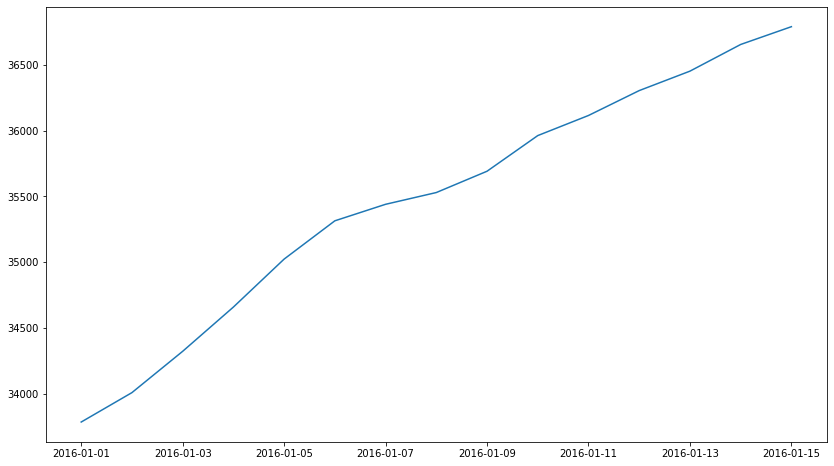

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(train)
plt.show()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2016-01-01 to 2016-01-15
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cum_cons  15 non-null     float64
dtypes: float64(1)
memory usage: 796.0 bytes


# Creating Test Dataset

In [15]:
df4 = read_df('112')
print(df4.shape)

df5 = read_df('212')
print(df5.shape)

df6 = read_df('312')
print(df6.shape)

Null value is observed in DatetimeIndex([], dtype='datetime64[ns]', name='time1', freq='D')
id1                     int32
water_consumption1    float64
dtype: object
(16, 2)
Null value is observed in DatetimeIndex([], dtype='datetime64[ns]', name='time2', freq='D')
id2                     int32
water_consumption2    float64
dtype: object
(16, 2)
Null value is observed in DatetimeIndex([], dtype='datetime64[ns]', name='time3', freq='D')
id3                     int32
water_consumption3    float64
dtype: object
(16, 2)


In [16]:
#Concatenating the all the test data files.
test_df = pd.concat([df4, df5, df6], axis = 1)
test_df

,id1,water_consumption1,id2,water_consumption2,id3,water_consumption3
2016-01-16,661,9779.677778,781,19944.765972,9971,7529.439583
2016-01-17,661,9894.480976,781,20129.602778,9971,7622.463889
2016-01-18,661,9976.896259,781,20308.954167,9971,7698.938889
2016-01-19,661,10060.777461,781,20466.229167,9971,7856.814583
2016-01-20,661,10113.007725,781,20582.594444,9971,7930.429167
2016-01-21,661,10170.897917,781,20698.593056,9971,8005.856944
2016-01-22,661,10221.880556,781,20824.047222,9971,8060.618056
2016-01-23,661,10273.503472,781,20968.419444,9971,8142.485417
2016-01-24,661,10407.472222,781,21165.834028,9971,8219.674306
2016-01-25,661,10525.602778,781,21363.904861,9971,8302.809722


In [17]:
# Adding up all the test water consumption data together

test_df['cum_cons'] = test_df['water_consumption1'] +test_df['water_consumption2']+test_df['water_consumption3']
test_df_cum = test_df.loc[:, ['cum_cons']]
print(test_df_cum.shape)
test_df_cum

(16, 1)


,cum_cons
2016-01-16,37253.883333
2016-01-17,37646.547643
2016-01-18,37984.789314
2016-01-19,38383.821211
2016-01-20,38626.031336
2016-01-21,38875.347917
2016-01-22,39106.545833
2016-01-23,39384.408333
2016-01-24,39792.980556
2016-01-25,40192.317361


In [18]:
test = test_df[['cum_cons']].copy()

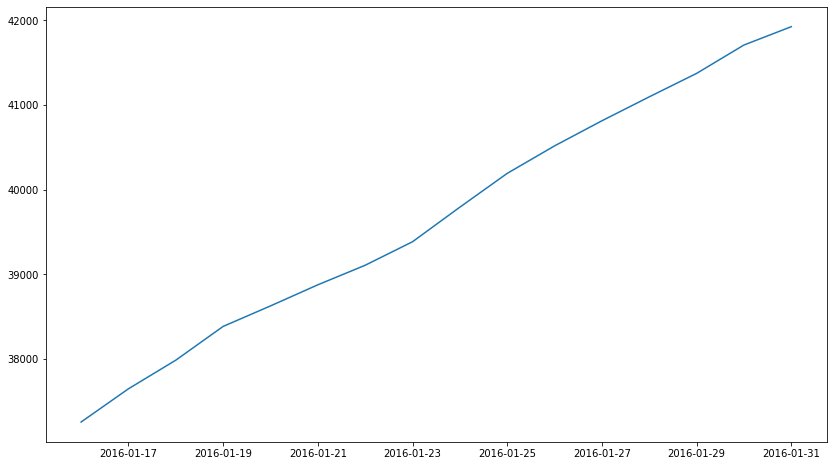

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(test)
plt.show()

In [20]:
import sklearn

In [21]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0, 1))
scale.fit(train)
train = scale.transform(train)
test = scale.transform(test)

In [22]:
import numpy as np
def datasetCreation(data, lback=1):
    X, Y = list(), list()
    for i in range(len(data)-lback-1):
        a = data[i:(i+lback), 0]
        X.append(a)
        Y.append(data[i + lback, 0])
    return np.array(X), np.array(Y)

In [23]:
trainX, trainY = datasetCreation(train, 1)
testX, testY = datasetCreation(test, 1)

In [24]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [25]:
import numpy as np
np.random.seed(10)

# LSTM2

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
2/2 - 2s - loss: 0.3962
Epoch 2/100
2/2 - 0s - loss: 0.3903
Epoch 3/100
2/2 - 0s - loss: 0.3844
Epoch 4/100
2/2 - 0s - loss: 0.3793
Epoch 5/100
2/2 - 0s - loss: 0.3744
Epoch 6/100
2/2 - 0s - loss: 0.3693
Epoch 7/100
2/2 - 0s - loss: 0.3642
Epoch 8/100
2/2 - 0s - loss: 0.3589
Epoch 9/100
2/2 - 0s - loss: 0.3539
Epoch 10/100
2/2 - 0s - loss: 0.3482
Epoch 11/100
2/2 - 0s - loss: 0.3431
Epoch 12/100
2/2 - 0s - loss: 0.3374
Epoch 13/100
2/2 - 0s - loss: 0.3316
Epoch 14/100
2/2 - 0s - loss: 0.3259
Epoch 15/100
2/2 - 0s - loss: 0.3196
Epoch 16/100
2/2 - 0s - loss: 0.3137
Epoch 17/100
2/2 - 0s - loss: 0.3073
Epoch 18/100
2/2 - 0s - loss: 0.3007
Epoch 19/100
2/2 - 0s - loss: 0.2943
Epoch 20/100
2/2 - 0s - loss: 0.2871
Epoch 21/100
2/2 - 0s - loss: 0.2799
Epoch 22/100
2/2 - 0s - loss: 0.2727
Epoch 23/100
2/2 - 0s - loss: 0.2651
Epoch 24/100
2/2 - 0s - loss: 0.2570
Epoch 25/100
2/2 - 0s - loss: 0.2490
Epoch 26/100
2/2 - 0s - loss: 0.2401
Epoch 27/100
2/2 - 0s - loss: 0.2314
Epoch 28/1

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


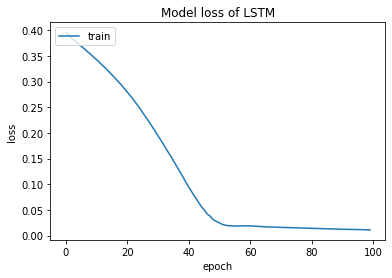

In [28]:
loss_per_epoch = history.history['loss']
import matplotlib.pyplot as plt
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title('Model loss of LSTM')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

In [29]:
tr_pred = model.predict(trainX)
tr_pred = scale.inverse_transform(tr_pred)
trainY = scale.inverse_transform([trainY])
trainY = trainY.T

In [30]:
import math
from sklearn.metrics import mean_squared_error
tr_rmse = math.sqrt(mean_squared_error(trainY, tr_pred))

In [31]:
tr_rmse

315.6096471538541

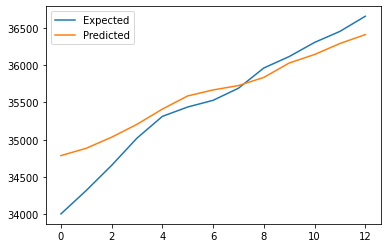

In [32]:
plt.plot(trainY, label='Expected')
plt.plot(tr_pred, label='Predicted')
plt.legend()
plt.show()

In [33]:
te_pred = model.predict(testX)
te_pred = scale.inverse_transform(te_pred)
testY = scale.inverse_transform([testY])

In [34]:
testY = testY.T

In [35]:
te_rmse = math.sqrt(mean_squared_error(testY, te_pred))
te_rmse

726.1742781991015

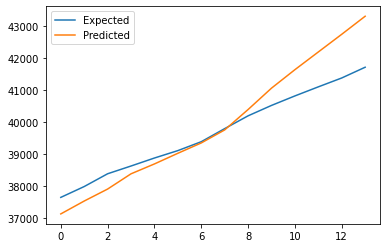

In [36]:
plt.plot(testY, label='Expected')
plt.plot(te_pred, label='Predicted')
plt.legend()
plt.show()